In [37]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_digits, load_iris
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics, svm, cluster


digits = load_digits()
n_samples = len(digits.images)

data = digits.images.reshape((n_samples, -1))


X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)



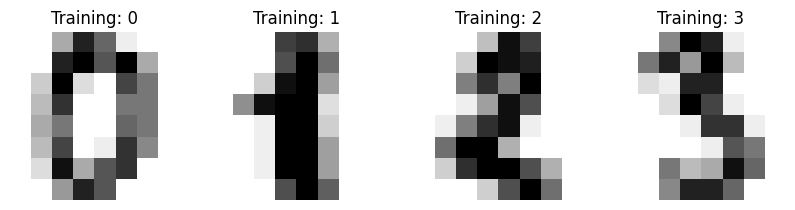

In [38]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [39]:
clf = MLPClassifier(solver='adam', alpha=1e-5,
                    hidden_layer_sizes=(100, 50,25), random_state=1)

clf.fit(X_train, y_train)

pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)


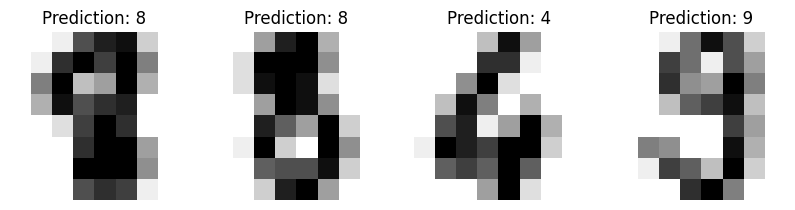

In [40]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, pred_test):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [41]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, pred_test)}\n"
)

Classification report for classifier MLPClassifier(alpha=1e-05, hidden_layer_sizes=(100, 50, 25), random_state=1):
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        88
           1       0.98      0.91      0.94        91
           2       0.94      0.99      0.97        86
           3       0.94      0.82      0.88        91
           4       1.00      0.95      0.97        92
           5       0.90      0.97      0.93        91
           6       0.98      0.99      0.98        91
           7       0.95      0.99      0.97        89
           8       0.93      0.92      0.93        88
           9       0.88      0.96      0.92        92

    accuracy                           0.95       899
   macro avg       0.95      0.95      0.95       899
weighted avg       0.95      0.95      0.95       899




In [42]:
clf = svm.SVC()

clf.fit(X_train, y_train)

pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)

Classification report for classifier SVC():
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        88
           1       0.97      0.97      0.97        91
           2       1.00      0.98      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.93      0.97      0.95        91
           6       0.99      0.99      0.99        91
           7       0.95      0.99      0.97        89
           8       0.92      0.95      0.94        88
           9       0.92      0.96      0.94        92

    accuracy                           0.96       899
   macro avg       0.96      0.96      0.96       899
weighted avg       0.96      0.96      0.96       899




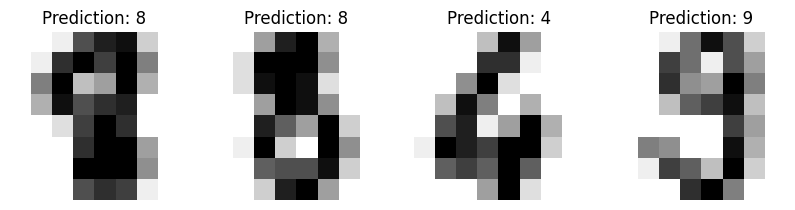

In [43]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, pred_test):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")


print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, pred_test)}\n"
)

## Clustering


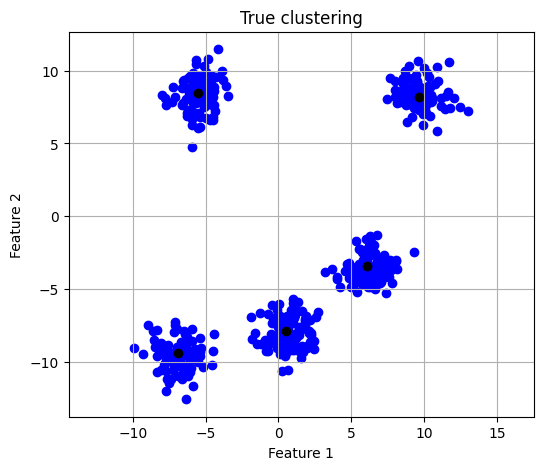

In [106]:
n_clusters = 5

centers = 10 * (1 - 2 * np.random.rand(n_clusters, 2))

data = np.vstack([
    np.vstack([x]*100) + 1 * np.random.randn(100, 2) for x in centers
])

# Create a scatter plot
plt.figure(figsize=(6, 5))

# True labels
plt.scatter(data[:, 0], data[:, 1], color='blue')
plt.scatter(centers[:, 0], centers[:, 1], color='black')

plt.title("True clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.axis('equal')
#plt.colorbar(label="Class")
plt.grid(True)

In [107]:

X_train, X_test = train_test_split(
    data, test_size=0.5, shuffle=True
)


In [108]:
clf = cluster.KMeans(n_clusters=n_clusters)

clf.fit(X_train)

pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)

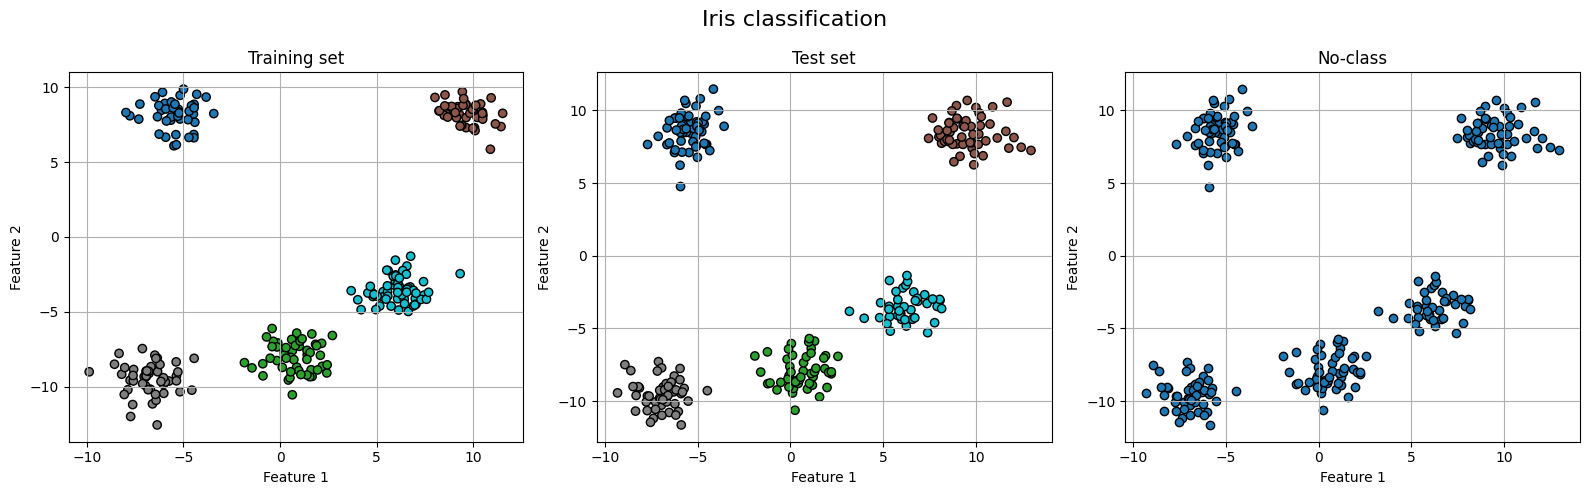

In [115]:
X_train = np.array(X_train)
X_test = np.array(X_test)

# Create a scatter plot
plt.figure(figsize=(16, 5))

# True labels
plt.subplot(1, 3, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=pred_train, cmap="tab10", edgecolor="k")
plt.title("Training set")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
#plt.colorbar(label="Class")
plt.grid(True)

# True labels
plt.subplot(1, 3, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=pred_test, cmap="tab10", edgecolor="k")
plt.title("Test set")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
#plt.colorbar(label="Class")
plt.grid(True)

# True labels
plt.subplot(1, 3, 3)
plt.scatter(X_test[:, 0], X_test[:, 1], edgecolor="k")
plt.title("No-class")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
#plt.colorbar(label="Class")
plt.grid(True)



# Add overall title and show plot
plt.suptitle('Iris classification', fontsize=16)
plt.tight_layout()
plt.show()

### Clustering - iris

In [128]:
iris = load_iris()
n_samples = len(digits.data)

data = iris.data


X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=True
)


In [132]:
# clf = cluster.AffinityPropagation()
clf = cluster.KMeans(n_clusters = 3)

clf.fit(X_train)

pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)

In [133]:
print(pred_test)
print(y_test)

[2 0 1 2 1 2 1 1 2 0 2 2 2 2 2 2 2 1 1 2 2 1 2 0 0 2 2 1 1 1 2 1 0 0 2 0 1
 0 2 1 0 1 1 1 2 1 2 1 1 2 0 0 1 2 2 1 0 1 2 2 0 0 0 2 0 1 1 0 0 2 1 1 2 2
 0]
[2 2 0 1 0 1 0 0 2 2 1 1 1 1 1 2 2 0 0 1 1 0 2 2 2 1 1 0 0 0 1 0 2 1 1 2 0
 2 1 0 2 0 0 0 2 0 1 0 0 1 2 2 0 2 1 0 2 0 1 1 2 1 2 1 2 0 0 2 2 1 0 0 1 1
 2]


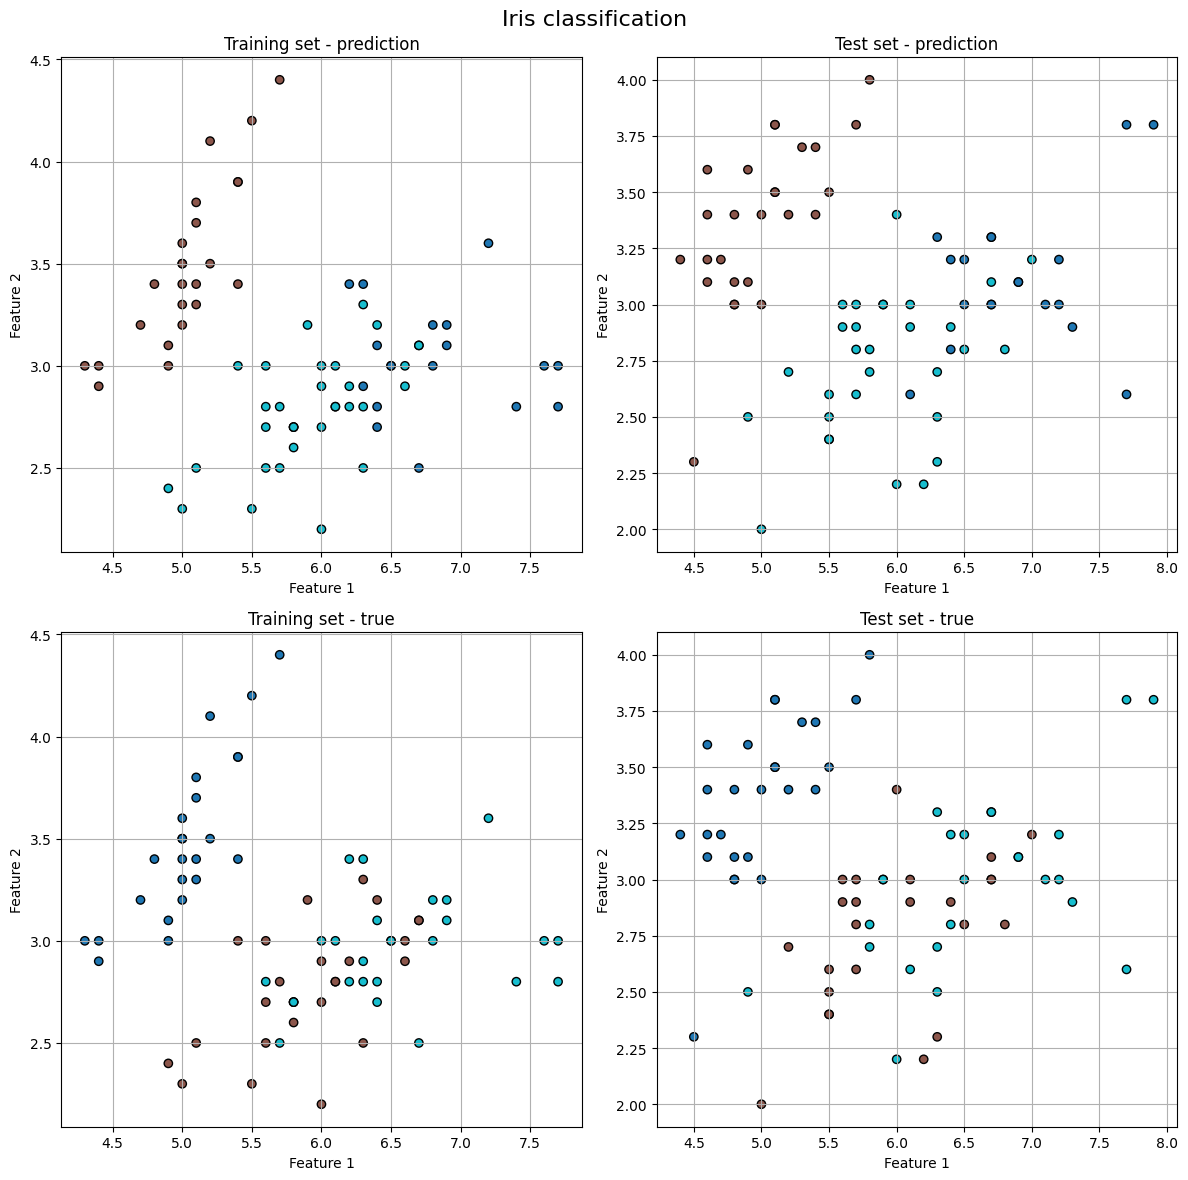

In [134]:
X_train = np.array(X_train)
X_test = np.array(X_test)

# Create a scatter plot
plt.figure(figsize=(12, 12))

# True labels
plt.subplot(2, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=pred_train, cmap="tab10", edgecolor="k")
plt.title("Training set - prediction")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
#plt.colorbar(label="Class")
plt.grid(True)

# True labels
plt.subplot(2, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=pred_test, cmap="tab10", edgecolor="k")
plt.title("Test set - prediction")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
#plt.colorbar(label="Class")
plt.grid(True)


# True labels
plt.subplot(2, 2, 3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="tab10", edgecolor="k")
plt.title("Training set - true")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
#plt.colorbar(label="Class")
plt.grid(True)

# True labels
plt.subplot(2, 2, 4)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="tab10", edgecolor="k")
plt.title("Test set - true")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
#plt.colorbar(label="Class")
plt.grid(True)


# Add overall title and show plot
plt.suptitle('Iris classification', fontsize=16)
plt.tight_layout()
plt.show()

